# What Tech Skills Are People Most Interested In Learning?

## Introduction
Even in 2022, tech is still a buzz word. You can hear it at every corner of the internet, everyone is talking about one tech job or the other. On twitter you see several tweets and threads talking about picking up a tech skill and how to improve your tech skill and so I decided to look into data collected by <a href="https://www.freecodecamp.org/">FreeCodeCamp</a> on their 2021 coders survey. As someone who is interested in tech as well and also starting my journey into the world of data science, I was curious to know what tech skills others are picking up or interested in, why they are trying to learn these skills etc. I was also curious about the inclusiveness of tech jobs, and what percentages that minorities make up in these jobs.  While I did manage to answer most of these questions, I'm not completely certain how well the data represents the population. You can find the data used for this analysis <a href="https://github.com/yickysan/FCC-survey">here</a> on my github. If you want the original FreeCodeCamp survey data, you can find it <a href="https://github.com/freeCodeCamp/2021-new-coder-survey">here</a> .

Our main focus will be on the following questions:
* Why are people interested in coding.
* What career path are people most interested in.
* How much are people willing to spend on learning and what resources are they using.
* How much do new devs expect to earn and how it compares to what new devs actually earn.
* How inclusive dev jobs are.

## Initial Data exploration And Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
fcc = pd.read_csv("2021_coders_survey.csv", low_memory=False)
pd.set_option("display.max_columns", None)

In [3]:
fcc.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
fcc

,Timestamp,reason_for_learning,learning_method,online_resources,hours_learning,months_programming,amount_spent,employed_dev,first_dev_job,dev_interest,company_type,career_interest,job_application,expected_earnings,reasons_for_interest,ideal_workdays,relocation,employment_status,employment_field,previous_year_earnings,age,gender,race,region,US_state,country_citizen,ethnic_minority,highest_degree,student,marital_status,current_job_duration,job_search_duration,earnings,benefits,job_security,work_life_balance,professional_growth,company_culture,inclusiveness,work_load,commute_time,military_service,disability,high_speed_internet
0,2021-07-01 10:10:23,To succeed in current career,"Online resources, Books, In-person bootcamps, ...","freeCodeCamp, Mozilla Developer Network (MDN),...",4.0,120,NaN,Yes,No,NaN,NaN,DevOps / SysAdmin,I am already a developer,NaN,"Work from home opportunities, Flex-time/flexib...",All days from home,Maybe,Full-time employed for wages,Software development and IT,NaN,33.0,Prefer not to say,Alien,Europe and Central Asia,NaN,No,NaN,"Professional degree (MBA, MD, JD, etc.)",No,"Single, never married",1 to 3 years,1.0,Somewhat satisfied,Very satisfied,Somewhat satisfied,Somewhat dissatisfied,I do not know,Somewhat satisfied,Somewhat satisfied,Very dissatisfied,I work from home,No,No,Yes
1,2021-07-01 10:31:01,To change careers,"Online resources, Books, Online bootcamps","freeCodeCamp, Mozilla Developer Network (MDN),...",10.0,6,30,No,I am not employed as a developer,I am already a developer,Work for a startup,Front-End Web Developer,Within the next 6 months,"$10,000 to $20,999","Software Development jobs are well paid, Work ...",2 days from home and 3 days in an office,Yes,Full-time employed for wages,Oilfield,"Under $1,000",38.0,Male,Hispanic/Latino(a/x),Latin America and Caribbean,I am not living in the US,No,No,Bachelor’s degree,No,Married or domestic partnership,more than 3 years,3.0,Very dissatisfied,Very dissatisfied,Very dissatisfied,Somewhat satisfied,Somewhat dissatisfied,Somewhat dissatisfied,Somewhat satisfied,Somewhat satisfied,15 to 29 minutes,No,Yes,Yes
2,2021-07-01 10:42:31,To change careers,"Online resources, Books, Hackathons, Meetup.co...","freeCodeCamp, Mozilla Developer Network (MDN),...",30.0,48,300,No,I am not employed as a developer,Yes,Work for a non profit,Full-Stack Web Developer,I am already applying,"$75,000 to $99,999","I love coding, Work from home opportunities, I...",All days from home,Yes,unemployed,I am not currently working,NaN,NaN,Male,NaN,North America,New York,No,NaN,Master's degree (non-professional),No,NaN,I am not currently working,24.0,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,I am not working,No,No,Yes
3,2021-07-01 11:06:43,As a hobby,"Online resources, Books","freeCodeCamp, Mozilla Developer Network (MDN),...",NaN,36,0,No,I am not employed as a developer,Yes,Freelance,Information Security,Within the next 6 months,NaN,I love solving problems,3 days from home and 2 days in an office,Yes,Not working but looking for work,I am not currently working,NaN,19.0,Male,Black/African American,Sub-Saharan Africa,NaN,No,Yes,High school diploma or equivalent (GED),Yes,"Single, never married",I am not currently working,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I am not working,No,No,No
4,2021-07-01 11:14:31,To start your first career,"Online resources, Books, Online bootcamps","freeCodeCamp, Stack Overflow, Coursera, Udemy",2.0,24,5000,Yes,Yes,I am already a developer,Work for a startup,Product Manager,I am already a developer,"$30,000 to $49,999","Software Development jobs are well paid, Build...",4 days from home and 1 day in an office,Yes,Full-time employed for wages,Finance,"$40,000 to $49,999",35.0,Male,East Asian,East Asia and Pacific,I am not living in the US,No,No,Bachelor’s degree,No,"Single, never married",more than 3 years,1.0,Somewhat satisfied,Somewhat dissatisfied,Somewhat dissatisfied,Somewhat satisfied

In [5]:
fcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18126 entries, 0 to 18125
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               18126 non-null  object 
 1   reason_for_learning     17991 non-null  object 
 2   learning_method         17860 non-null  object 
 3   online_resources        17390 non-null  object 
 4   hours_learning          16603 non-null  float64
 5   months_programming      16695 non-null  object 
 6   amount_spent            16153 non-null  object 
 7   employed_dev            17673 non-null  object 
 8   first_dev_job           17222 non-null  object 
 9   dev_interest            17537 non-null  object 
 10  company_type            17469 non-null  object 
 11  career_interest         17391 non-null  object 
 12  job_application         17553 non-null  object 
 13  expected_earnings       15751 non-null  object 
 14  reasons_for_interest    17588 non-null

There is a total of 18,126 rows with 44 columns. A lot of these columns have null values, we are going to look at the percentage of entries that are null each column.

In [6]:
null_percentage = round(fcc.isnull().sum()/fcc.shape[0] * 100, 2)

In [7]:
null_percentage

Timestamp                  0.00
reason_for_learning        0.74
learning_method            1.47
online_resources           4.06
hours_learning             8.40
months_programming         7.89
amount_spent              10.88
employed_dev               2.50
first_dev_job              4.99
dev_interest               3.25
company_type               3.62
career_interest            4.05
job_application            3.16
expected_earnings         13.10
reasons_for_interest       2.97
ideal_workdays             5.17
relocation                 4.19
employment_status          4.57
employment_field           6.85
previous_year_earnings    15.14
age                        5.64
gender                     3.66
race                       5.16
region                     4.92
US_state                  26.49
country_citizen            5.48
ethnic_minority            6.51
highest_degree             5.08
student                    4.70
marital_status             5.35
current_job_duration       6.53
job_sear

Apart from the Timestamp column, every other column have null values varying from less than 1% of the total entries to up to 32% of the total enteries. Because of how high some of these null values are, we can't just drop the rows with null values, we are going to lose a lot of data if we do so. So we are going to try to impute values into this null entries. We are going to look at columns with more than 10% null values and try to figure out how to impute values.

In [8]:
null_more_10 = null_percentage[null_percentage > 10]

In [9]:
null_more_10.index

Index(['amount_spent', 'expected_earnings', 'previous_year_earnings',
       'US_state', 'job_search_duration', 'earnings', 'benefits',
       'job_security', 'work_life_balance', 'professional_growth',
       'company_culture', 'inclusiveness', 'work_load', 'commute_time'],
      dtype='object')

In [10]:
fcc['amount_spent'].value_counts(dropna=False)

0         9942
NaN       1973
100        810
200        505
50         501
          ... 
400000       1
60000        1
10300        1
410          1
364          1
Name: amount_spent, Length: 406, dtype: int64

In [11]:
fcc['amount_spent'] = fcc['amount_spent'].fillna(0)

In [12]:
fcc['amount_spent'] = fcc['amount_spent'].astype(float).astype(int)

In [13]:
fcc['amount_spent'].value_counts()

0       11954
100       810
200       505
50        501
500       368
        ...  
9590        1
305         1
119         1
3395        1
364         1
Name: amount_spent, Length: 337, dtype: int64

For the `amount_spent` column, all of the null values were replaced with 0. This is assuming that the people who didn't respond to that question did not spend any money during their learning.

In [14]:
fcc["expected_earnings"].value_counts(dropna=False)

$50,000 to $74,999      3116
$0 to $4,999            2691
NaN                     2375
$30,000 to $49,999      2301
$10,000 to $20,999      1761
$5,000 to $9,999        1740
$75,000 to $99,999      1578
$20,000 to $29,999      1376
$100,000 to $124,999     676
$250,000 or over         212
$125,000 to $159,999     172
$160,000 to $199,999      74
$200,000 to $249,999      54
Name: expected_earnings, dtype: int64

The expected earning values is a range, e.g `$50,000 to $74,999`. To fix this we are going to remove the special character, split the string and take the average between the range.

In [15]:
fcc["expected_earnings"] = fcc["expected_earnings"].str.replace('$', "", regex=True).str.replace("over", "250000")

fcc["expected_earnings"] = fcc["expected_earnings"].str.split()

# taking average between range
fcc["expected_earnings"] = round((fcc["expected_earnings"].str[0].str.replace(",", "").astype(float) +
       fcc["expected_earnings"].str[2].str.replace(",", "").astype(float))/2)

In [16]:
fcc["expected_earnings"] = fcc["expected_earnings"].fillna(0)

In [17]:
fcc["expected_earnings"] = fcc["expected_earnings"].astype(int)

In [18]:
fcc["expected_earnings"].value_counts()

62500     3116
2500      2691
0         2375
40000     2301
15500     1761
7500      1740
87500     1578
25000     1376
112500     676
250000     212
142500     172
180000      74
225000      54
Name: expected_earnings, dtype: int64

For the `expected_earnings` column, after cleaning the data to get the expected earning, I replaced the null values with 0 too.

In [19]:
fcc['previous_year_earnings'].value_counts(dropna=False)

None                      5234
NaN                       2745
Under $1,000              1609
$1,000 to $2,999           981
$10,000 to $14,999         809
$3,000 to $4,999           669
$20,000 to $24,999         633
$40,000 to $49,999         599
$5,000 to $6,999           547
$15,000 to $19,999         530
$50,000 to $59,999         508
$7,000 to $9,999           492
$30,000 to $34,999         484
$25,000 to $29,999         476
$60,000 to $74,999         440
$35,000 to $39,999         365
$75,000 to $89,999         323
$90,000 to $119,999        277
$120,000 to $159,999       137
I don't want to answer     122
I don’t know                60
$160,000 to $199,999        39
$250,000 or over            32
$200,000 to $249,999        15
Name: previous_year_earnings, dtype: int64

The `previous_year_earnings` column has the same type of values as the `expected_earnings` column, so we are going to do the same thing and take the average between the range.

In [20]:
fcc['previous_year_earnings'] = fcc['previous_year_earnings'].str.replace('$', "", regex=True)
fcc['previous_year_earnings'] = fcc['previous_year_earnings'].str.split()

# taking average between range
fcc['previous_year_earnings'] = round(
    (fcc['previous_year_earnings'].str[0].str.replace(",", "").str.replace("Under", "2000").str.replace("None", "0").str.replace("I", "0").astype(float)
    + fcc['previous_year_earnings'].str[2].str.replace(",", "").str.replace("want", "0").str.replace("over", "250000").str.replace("know", "0").astype(float).fillna(0))/2
)

In [21]:
fcc['previous_year_earnings'].value_counts(dropna=False)

0.0         5416
NaN         2745
1000.0      1609
2000.0       981
12500.0      809
4000.0       669
22500.0      633
45000.0      599
6000.0       547
17500.0      530
55000.0      508
8500.0       492
32500.0      484
27500.0      476
67500.0      440
37500.0      365
82500.0      323
105000.0     277
140000.0     137
180000.0      39
250000.0      32
225000.0      15
Name: previous_year_earnings, dtype: int64

In [22]:
fcc["previous_year_earnings"] = fcc["previous_year_earnings"].fillna(0)

In [23]:
fcc["previous_year_earnings"].value_counts(dropna=False)

0.0         8161
1000.0      1609
2000.0       981
12500.0      809
4000.0       669
22500.0      633
45000.0      599
6000.0       547
17500.0      530
55000.0      508
8500.0       492
32500.0      484
27500.0      476
67500.0      440
37500.0      365
82500.0      323
105000.0     277
140000.0     137
180000.0      39
250000.0      32
225000.0      15
Name: previous_year_earnings, dtype: int64

In [24]:
fcc["US_state"] = fcc["US_state"].fillna("unknown")

In [25]:
fcc["job_search_duration"].value_counts(dropna=False)

NaN             5774
0.000000e+00    4115
1.000000e+00    2137
2.000000e+00    1379
3.000000e+00    1235
                ... 
1.000000e+13       1
9.990000e+02       1
8.000000e-01       1
8.080808e+15       1
5.510000e+02       1
Name: job_search_duration, Length: 73, dtype: int64

In [26]:
fcc["job_search_duration"] = fcc["job_search_duration"].fillna(0)

In [27]:
fcc["earnings"].value_counts(dropna=False)

NaN                      5769
Not Applicable           3410
Somewhat satisfied       3105
Somewhat dissatisfied    2318
Very dissatisfied        2184
Very satisfied           1073
I do not know             267
Name: earnings, dtype: int64

In [28]:
fcc["benefits"].value_counts(dropna=False)

NaN                      5847
Not Applicable           3854
Somewhat satisfied       2716
Very dissatisfied        2101
Somewhat dissatisfied    1752
Very satisfied           1521
I do not know             335
Name: benefits, dtype: int64

In [29]:
# replacing null values with "I do not know"
for value in list(null_more_10.index[-9:-1]):
    fcc[value] = fcc[value].fillna('I do not know')

In [30]:
fcc["benefits"].value_counts(dropna=False)

I do not know            6182
Not Applicable           3854
Somewhat satisfied       2716
Very dissatisfied        2101
Somewhat dissatisfied    1752
Very satisfied           1521
Name: benefits, dtype: int64

In [31]:
fcc["commute_time"].value_counts(dropna=False)

I am not working        6873
I work from home        2980
NaN                     2223
15 to 29 minutes        1902
Less than 15 minutes    1596
30 to 44 minutes        1071
45 to 60 minutes         770
More than 60 minutes     711
Name: commute_time, dtype: int64

In [32]:
fcc["commute_time"] = fcc["commute_time"].fillna('unknown')

In [33]:
null_less_10 = null_percentage[null_percentage < 10]

In [34]:
null_less_10

Timestamp               0.00
reason_for_learning     0.74
learning_method         1.47
online_resources        4.06
hours_learning          8.40
months_programming      7.89
employed_dev            2.50
first_dev_job           4.99
dev_interest            3.25
company_type            3.62
career_interest         4.05
job_application         3.16
reasons_for_interest    2.97
ideal_workdays          5.17
relocation              4.19
employment_status       4.57
employment_field        6.85
age                     5.64
gender                  3.66
race                    5.16
region                  4.92
country_citizen         5.48
ethnic_minority         6.51
highest_degree          5.08
student                 4.70
marital_status          5.35
current_job_duration    6.53
military_service        7.04
disability              7.79
high_speed_internet     4.35
dtype: float64

For the columns with less than 10% null values, most of the values in the columns are non-numerical and so I have chosen to replace them with `"Unknown"`.

In [35]:
for value in null_less_10.index:
    fcc[value] = fcc[value].fillna("Unknown")

In [36]:
fcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18126 entries, 0 to 18125
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               18126 non-null  object 
 1   reason_for_learning     18126 non-null  object 
 2   learning_method         18126 non-null  object 
 3   online_resources        18126 non-null  object 
 4   hours_learning          18126 non-null  object 
 5   months_programming      18126 non-null  object 
 6   amount_spent            18126 non-null  int32  
 7   employed_dev            18126 non-null  object 
 8   first_dev_job           18126 non-null  object 
 9   dev_interest            18126 non-null  object 
 10  company_type            18126 non-null  object 
 11  career_interest         18126 non-null  object 
 12  job_application         18126 non-null  object 
 13  expected_earnings       18126 non-null  int32  
 14  reasons_for_interest    18126 non-null

We've somehow managed to deal with the null values. Now we can answer certain questions.

## Why are people interested in coding?
Our goal here is to figure out the major reasons people are learning to code.

In [37]:
# top 20 reasons people are learning to code
fcc["reason_for_learning"].value_counts().sort_values(ascending=False).head(20)

To change careers                                                                                   4988
To start your first career                                                                          4834
To start a business or to freelance                                                                 2469
To succeed in current career                                                                        2089
As a hobby                                                                                          2043
To create art or entertainment                                                                       484
To meet school requirements                                                                          282
Unknown                                                                                              135
To change the world                                                                                    4
Curiosity                                              

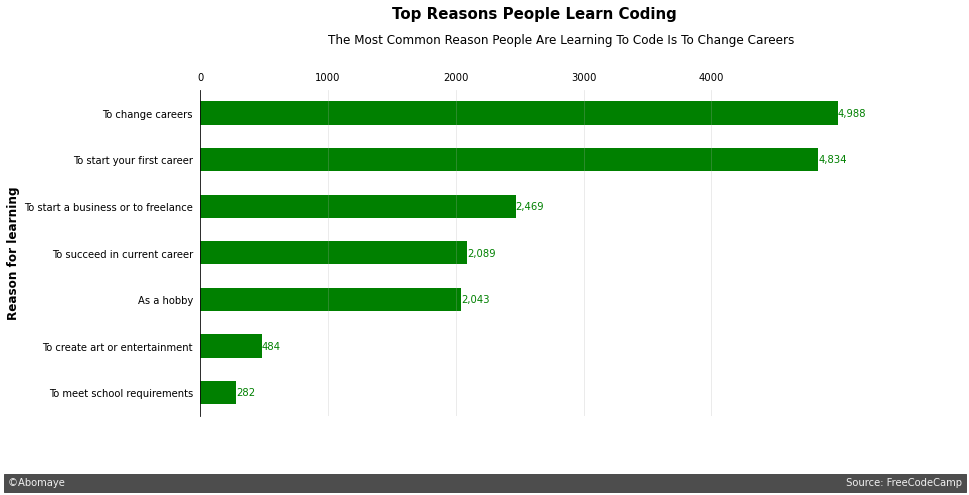

In [38]:
ax, fig = plt.subplots(figsize=(12, 6))
ax = fcc["reason_for_learning"].value_counts().sort_values(ascending=False).head(7).iloc[::-1].plot.barh(color='green')
ax.set_xticks(np.arange(0, 5000, 1000)) # defining xtick values
ax.get_xaxis().tick_top() # moving the xticks to the top of the chart
ax.tick_params(bottom=0, left=0, top=0) # removing the ticks
# removing the spines
spines = ["top", "bottom", "right"]
for spine in spines:
    ax.spines[spine].set_visible(False)

# adding vertical grid lines
ax.grid(axis="x", alpha=0.3)

ax.set_ylabel("Reason for learning", weight="bold", size=12)

ax.set_title("Top Reasons People Learn Coding", weight="bold", size=15, y=1.2)
ax.bar_label(ax.containers[0], color="green",
            labels= [f"{x:,.0f}" for x in ax.containers[0].datavalues]) # adding bar values as labels

ax.text(1000, 7.5, "The Most Common Reason People Are Learning To Code Is To Change Careers",
       size=12)

# adding source text
ax.text(-1500,-2, "©Abomaye" +" "*250 + "Source: FreeCodeCamp",
       color="#f0f0f0", backgroundcolor="#4d4d4d")

plt.show()

The most common reasons people are learning to code are to change careers, start a first career or to start a business or freelance. Of course there are other reasons but these are the most common three reasons.

## What career path are people most interested in?
We have just answered why people are learning to code, here we wamt to find out what career path they are most interested in. We also want to find out the interest in each specific region.

In [39]:
fcc["career_interest"].value_counts().head(10)

Full-Stack Web Developer                                5759
Front-End Web Developer                                 2063
Data Scientist                                          1995
Game Developer                                          1400
Back-End Web Developer                                   895
Information Security                                     864
Unknown                                                  737
I am not interested in a software development career     659
Mobile Developer                                         643
Data Engineer                                            481
Name: career_interest, dtype: int64

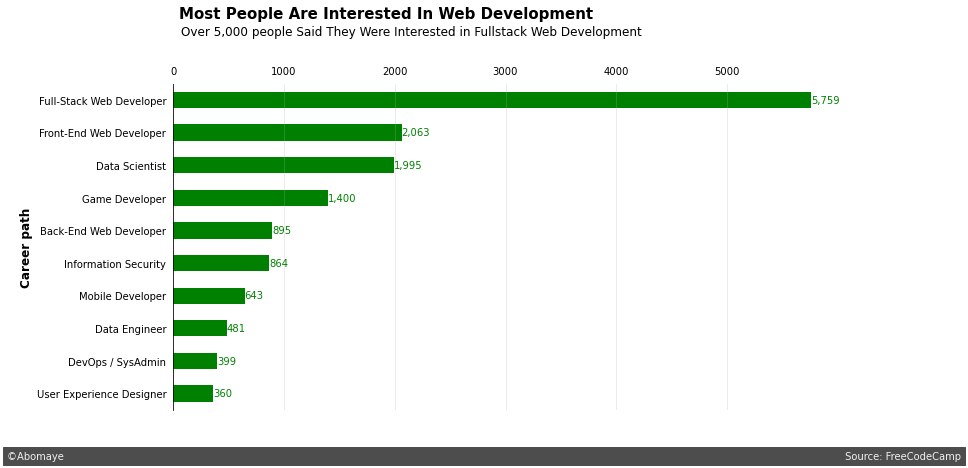

In [40]:
ax, fig = plt.subplots(figsize=(12, 6))
ax = fcc["career_interest"].value_counts().head(12).drop(["I am not interested in a software development career", "Unknown"]).iloc[::-1].plot.barh(color='green')
ax.set_xticks(np.arange(0, 6000, 1000))
ax.get_xaxis().tick_top()
ax.tick_params(bottom=0, left=0, top=0)
spines = ["top", "bottom", "right"]
for spine in spines:
    ax.spines[spine].set_visible(False)
ax.grid(axis="x", alpha=0.3)
ax.set_ylabel("Career path", weight="bold", size=12)
ax.bar_label(ax.containers[0], color="green",
            labels= [f"{x:,.0f}" for x in ax.containers[0].datavalues])
ax.text(50, 11.5, "Most People Are Interested In Web Development",
       weight="bold", size=15)
ax.text(70, 11, "Over 5,000 people Said They Were Interested in Fullstack Web Development",
       size=12)
ax.text(-1500,-2, "©Abomaye" +" "*250 + "Source: FreeCodeCamp",
       color="#f0f0f0", backgroundcolor="#4d4d4d")

plt.show()

In [41]:
fcc["region"].value_counts()

North America                   4984
Europe and Central Asia         3406
South Asia                      2316
Latin America and Caribbean     2197
Southeast Asia                  1546
Sub-Saharan Africa              1377
Unknown                          892
Middle East and North Africa     881
East Asia and Pacific            527
Name: region, dtype: int64

In [42]:
region_grp = fcc.groupby("region")

In [43]:
regions = []
for i in fcc["region"].value_counts().index:
    region = region_grp.get_group(i)
    regions.append(region)

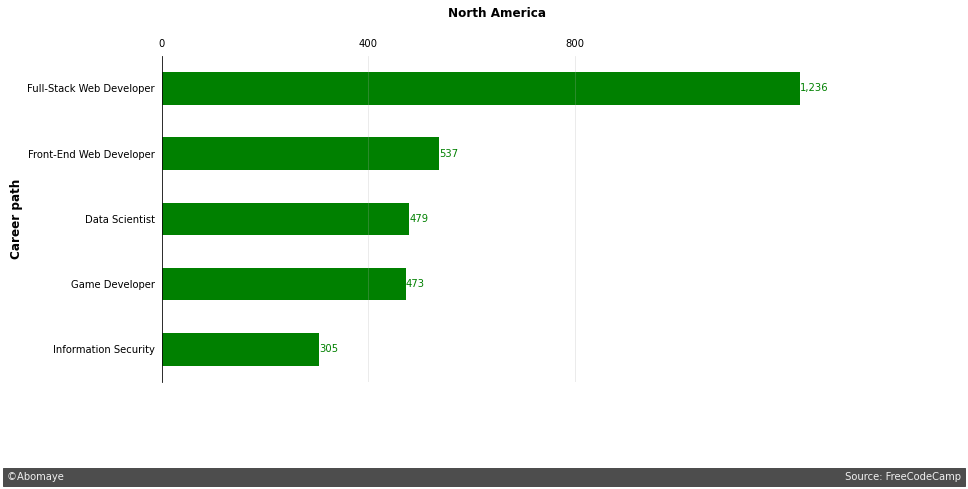

In [44]:
ax, fig = plt.subplots(figsize=(12, 6))
ax = regions[0]["career_interest"].value_counts().head(5).iloc[::-1].plot.barh(color="green")
ax.set_xticks(np.arange(0, 1200, 400))
ax.get_xaxis().tick_top()
ax.tick_params(bottom=0, left=0, top=0)
spines = ["top", "bottom", "right"]
for spine in spines:
    ax.spines[spine].set_visible(False)
    
ax.grid(axis="x", alpha=0.3)
plt.title(regions[0]["region"].value_counts().head(1).index.values[0], weight="bold", y=1.1)
ax.set_ylabel("Career path", weight="bold", size=12)
ax.bar_label(ax.containers[0], color="green",
            labels= [f"{x:,.0f}" for x in ax.containers[0].datavalues])
ax.text(-300,-2, "©Abomaye" +" "*250 + "Source: FreeCodeCamp",
       color="#f0f0f0", backgroundcolor="#4d4d4d")

plt.show()

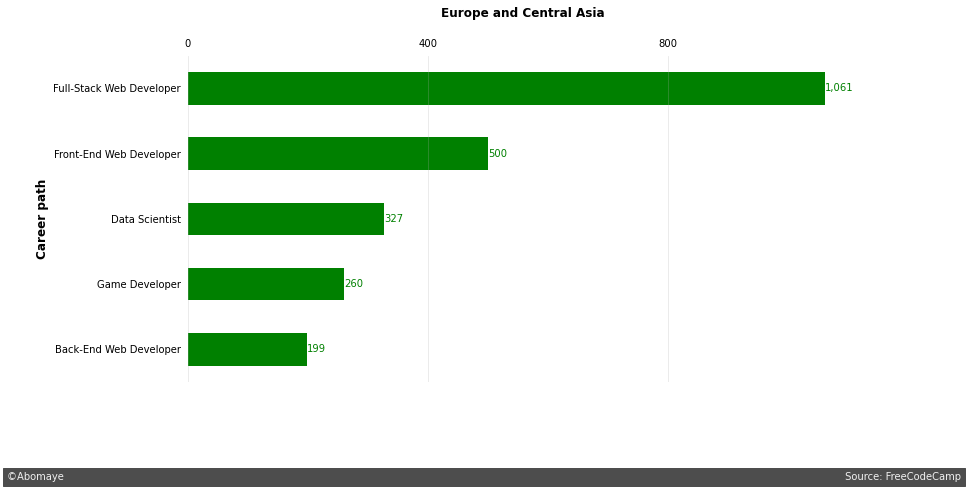

In [45]:
ax, fig = plt.subplots(figsize=(12, 6))
ax = regions[1]["career_interest"].value_counts().head(5).iloc[::-1].plot.barh(color='green')
ax.set_xticks(np.arange(0, 1200, 400))
ax.get_xaxis().tick_top()
ax.tick_params(bottom=0, left=0, top=0)
spines = ["top", "bottom", "right", "left"]
for spine in spines:
    ax.spines[spine].set_visible(False)

ax.grid(axis="x", alpha=0.3)
plt.title(regions[1]["region"].value_counts().head(1).index.values[0], weight="bold", y=1.1)
ax.set_ylabel("Career path", weight="bold", size=12)
ax.bar_label(ax.containers[0], color="green",
            labels= [f"{x:,.0f}" for x in ax.containers[0].datavalues])
ax.text(-300,-2, "©Abomaye" +" "*250 + "Source: FreeCodeCamp",
       color="#f0f0f0", backgroundcolor="#4d4d4d")

plt.show()

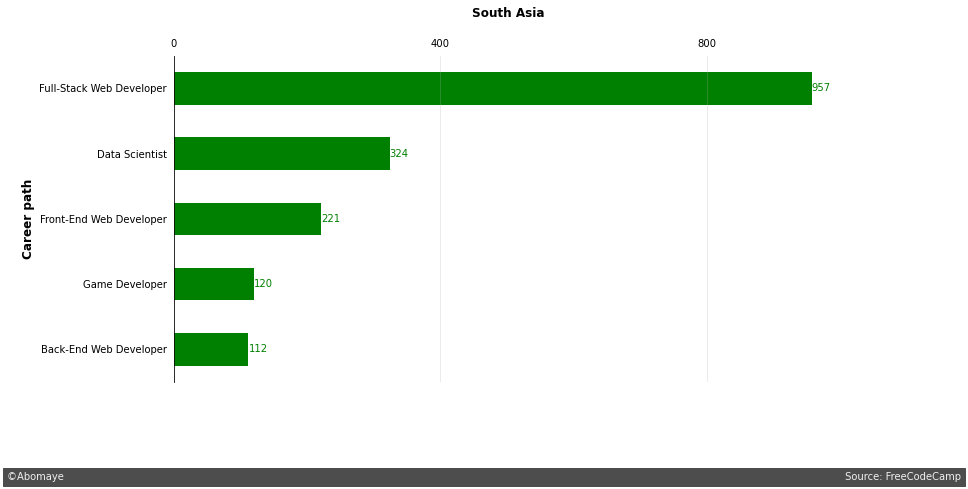

In [46]:
ax, fig = plt.subplots(figsize=(12, 6))
ax = regions[2]["career_interest"].value_counts().head(5).iloc[::-1].plot.barh(color='green')
ax.set_xticks(np.arange(0, 1000, 400))
ax.get_xaxis().tick_top()
ax.tick_params(bottom=0, left=0, top=0)
spines = ["top", "bottom", "right"]
for spine in spines:
    ax.spines[spine].set_visible(False)

ax.grid(axis="x", alpha=0.3)
plt.title(regions[2]["region"].value_counts().head(1).index.values[0], weight="bold", y=1.1)
ax.set_ylabel("Career path", weight="bold", size=12)
ax.bar_label(ax.containers[0], color="green")
ax.text(-250,-2, "©Abomaye" +" "*250 + "Source: FreeCodeCamp",
       color="#f0f0f0", backgroundcolor="#4d4d4d")

plt.show()

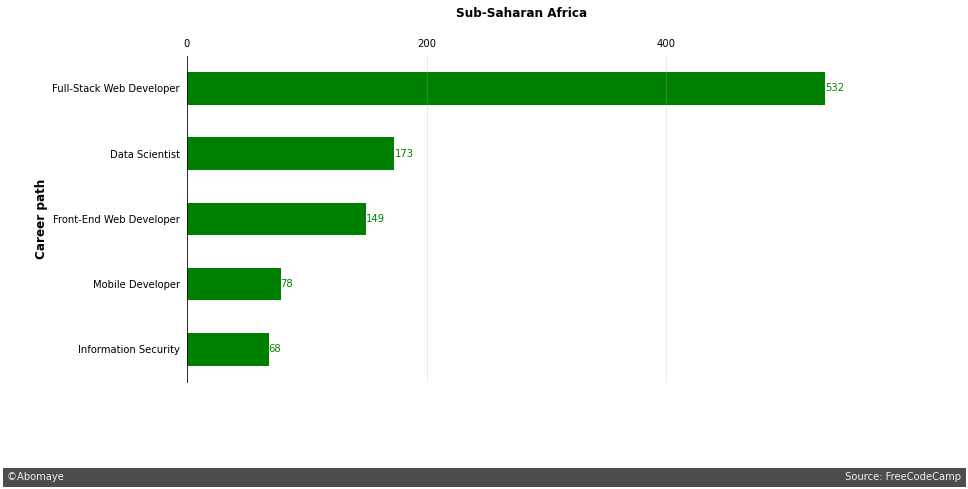

In [47]:
ax, fig = plt.subplots(figsize=(12, 6))
ax = regions[5]["career_interest"].value_counts().head(5).iloc[::-1].plot.barh(color='green')
ax.set_xticks(np.arange(0, 600, 200))
ax.get_xaxis().tick_top()
ax.tick_params(bottom=0, left=0, top=0)
spines = ["top", "bottom", "right"]
for spine in spines:
    ax.spines[spine].set_visible(False)

ax.grid(axis="x", alpha=0.3)
plt.title(regions[5]["region"].value_counts().head(1).index.values[0], weight="bold", y=1.1)
ax.set_ylabel("Career path", weight="bold", size=12)
ax.bar_label(ax.containers[0], color="green")
ax.text(-150,-2, "©Abomaye" +" "*250 + "Source: FreeCodeCamp",
       color="#f0f0f0", backgroundcolor="#4d4d4d")

plt.show()

In general people are interested in web devlopment, especially fullstack web development. Even when looked at granularly by taking into account the interest in each region, web development is still the dominant skill people are interested in.

## How much are people willing to spend on learning and what resources are they using?
Here we want to figure out just how much people spend in pursuit of their tech careers and what resource they use in learning.

In [48]:
fcc['amount_spent'].describe()

count    1.812600e+04
mean    -1.179471e+05
std      1.595068e+07
min     -2.147484e+09
25%      0.000000e+00
50%      0.000000e+00
75%      5.000000e+01
max      2.500001e+06
Name: amount_spent, dtype: float64

Looking at the description of the `amount_spent` column, one of the first things you notice is that the mean is a huge negative number. This is because the minimum value is -2,147,483,648. We also have the maximum amount to be around 2,500,001 which is a rather unlikely amount to be spent on learning. Let's explore these two entries further.

In [49]:
fcc[(fcc["amount_spent"]==-2147483648) | (fcc["amount_spent"]==2500001)]

,Timestamp,reason_for_learning,learning_method,online_resources,hours_learning,months_programming,amount_spent,employed_dev,first_dev_job,dev_interest,company_type,career_interest,job_application,expected_earnings,reasons_for_interest,ideal_workdays,relocation,employment_status,employment_field,previous_year_earnings,age,gender,race,region,US_state,country_citizen,ethnic_minority,highest_degree,student,marital_status,current_job_duration,job_search_duration,earnings,benefits,job_security,work_life_balance,professional_growth,company_culture,inclusiveness,work_load,commute_time,military_service,disability,high_speed_internet
392,2021-07-09 02:37:14,To change the evolution of evolution,My mind. Our minds.,All of the above and none of the above.,0.0,666,-2147483648,No,Yes,I am already a developer,ME,evol ME,I am already applying,40000,I am not interested in a software development ...,2 days from home and 3 days in an office,Yes,EVOLME EVOLME evolme,evolutionary biology and chemistry and biochem...,0.0,45.0,Both,ALIENTY you are doing well,Middle East and North Africa,I am not living in the US,Yes,Yes,No high school (secondary school),Yes,"Single, never married",more than 3 years,8.080808e+15,Very satisfied,Not Applicable,Very satisfied,Not Applicable,Very satisfied,Not Applicable,Very satisfied,Not Applicable,I work from home,Not applicable,No,Yes
4937,2021-08-11 09:38:52,To start a business or to freelance,"Online resources, Books, Online bootcamps, Mee...","freeCodeCamp, Stack Overflow, Coursera, Codeca...",7.0,360,2500001,No,I am not employed as a developer,Yes,Start your own business,BlockChain Security,Within 7 to 12 months from now,112500,"I love solving problems, I want to make the wo...",4 days from home and 1 day in an office,Maybe,Full-time employed for wages,Manufacturing,12500.0,44.0,Male,Southeast Asian,Southeast Asia,I am not living in the US,No,Yes,Bachelor’s degree,No,Married or domestic partnership,more than 3 years,1.000000e+00,Very dissatisfied,Somewhat satisfied,Very dissatisfied,Very dissatisfied,Very dissatisfied,Very dissatisfied,Very dissatisfied,Very dissatisfied,45 to 60 minutes,No,No,Yes


For the entry with the huge negative number, we can see that the respondent was clearly making a joke and so we are going to drop that entry. The other entry belongs to a respondent who has been programming for 30 years and that could be the reason for such a huge amount. However, we are still going to drop that entry.

In [50]:
fcc.drop(392, inplace=True)

In [51]:
fcc.drop(4937, inplace=True)

In [52]:
fcc["amount_spent"].describe()

count     18124.000000
mean        390.370834
std        4415.802473
min           0.000000
25%           0.000000
50%           0.000000
75%          50.000000
max      400000.000000
Name: amount_spent, dtype: float64

Looking at the description again, with the defective entries removed, we have a mean of 390, minimum of 0 and a maximum of 400,000. We have a median value of 0, this means that people are more likely to learn for free than to spend money on learning.
We are going to visualize the distirbution of people who have spent at least a dollar but no more than 1000.

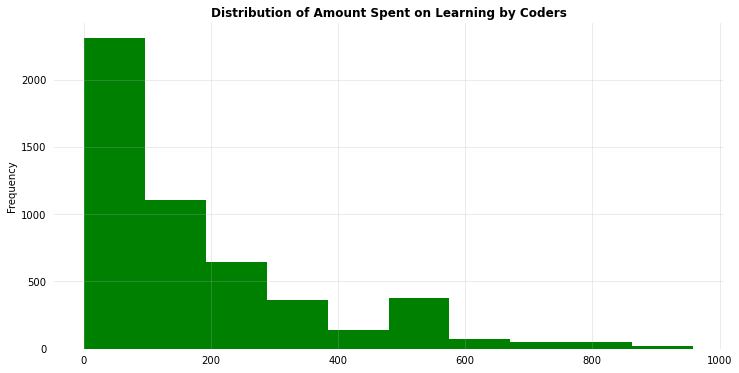

In [53]:
ax, fig = plt.subplots(figsize=(12, 6))
ax = fcc[(fcc["amount_spent"] < 1000) & (fcc["amount_spent"] > 0) ]["amount_spent"].plot.hist(color='green')
ax.tick_params(bottom=0, left=0)
spines = ["top", "bottom", "right", "left"]
for spine in spines:
    ax.spines[spine].set_visible(False)
ax.grid(True, alpha=0.3) # adding grid line
ax.set_title("Distribution of Amount Spent on Learning by Coders", weight="bold")
plt.show()

Our distribution is right skewed. For our distribution of respondents who have spent at least a dollar but not more than 1000, we see that majority of the respondents have spent between 0 to 100 dollars. It is pretty uncommon to spend around 1000 dollars. We are also going to look at the distibution of the amount spent each month.

In [54]:
fcc["months_programming"] = fcc["months_programming"].replace("Unknown", 0)

In [55]:
fcc["months_programming"] = fcc["months_programming"].astype(float).astype(int)

In [56]:
fcc["months_programming"].value_counts()

0       4230
1       2715
2       1521
3       1233
12      1083
        ... 
600        1
372        1
1973       1
62         1
129        1
Name: months_programming, Length: 154, dtype: int64

In [57]:
fcc["months_programming"] = fcc["months_programming"].replace(0, 1)

In [58]:
fcc["amount_per_month"] = (fcc["amount_spent"]/fcc["months_programming"]).astype(int)
fcc["amount_per_month"].value_counts()

0       12304
1         364
2         322
50        306
5         270
        ...  
2083        1
1598        1
119         1
3395        1
121         1
Name: amount_per_month, Length: 332, dtype: int64

In [59]:
fcc["amount_per_month"].describe()

count     18124.000000
mean         84.148146
std        1881.642603
min           0.000000
25%           0.000000
50%           0.000000
75%           5.000000
max      222000.000000
Name: amount_per_month, dtype: float64

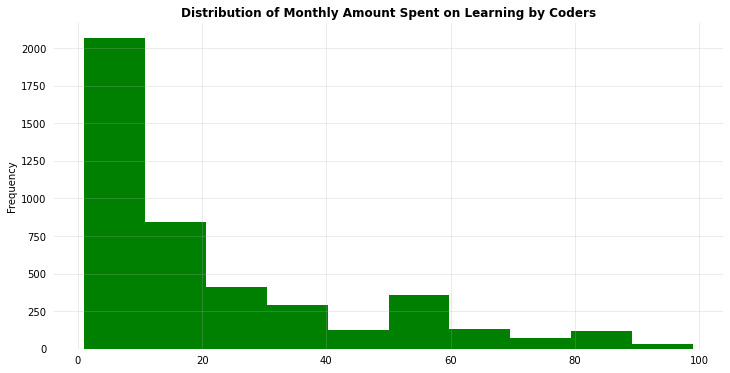

In [60]:
ax, fig = plt.subplots(figsize=(12, 6))
ax = fcc[(fcc["amount_per_month"]>0) & (fcc["amount_per_month"]<100)]["amount_per_month"].plot.hist(color='green')
ax.tick_params(bottom=0, left=0)
spines = ["top", "bottom", "right", "left"]
for spine in spines:
    ax.spines[spine].set_visible(False)
ax.grid(True, alpha=0.3)
ax.set_title("Distribution of Monthly Amount Spent on Learning by Coders", weight="bold")
plt.show()

The distibution of the amount spent monthly is unsurprisingly the same as the distribution of the amount spent. So let's look by the average amount spent by respondents in each region.

In [61]:
average_amount_region = fcc.groupby("region")["amount_per_month"].mean() # groups the data by the region and aggregate by the mean

In [62]:
average_amount_region.sort_values(ascending=False)

region
East Asia and Pacific           147.127135
North America                   131.822030
South Asia                      131.249568
Middle East and North Africa     83.628409
Sub-Saharan Africa               61.327524
Europe and Central Asia          54.778039
Latin America and Caribbean      35.579882
Southeast Asia                   28.449191
Unknown                          22.255605
Name: amount_per_month, dtype: float64

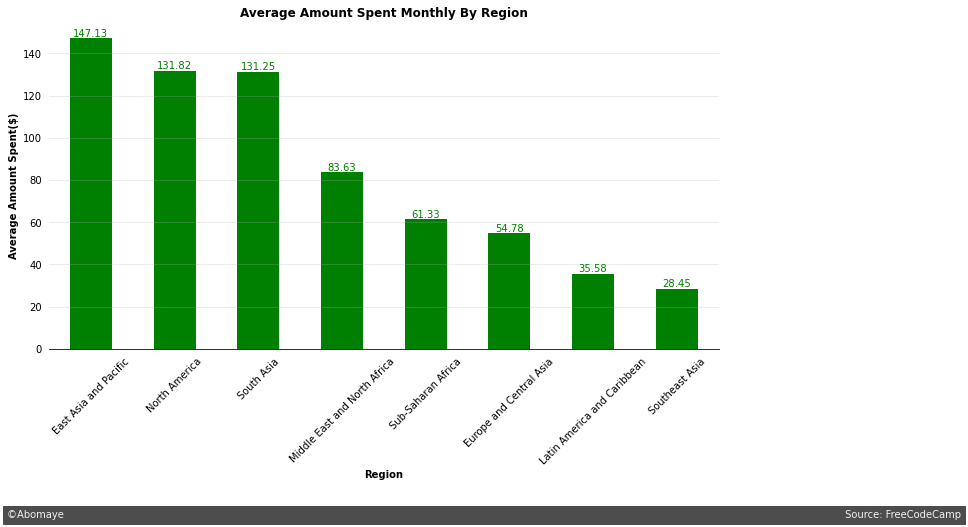

In [63]:
ax = average_amount_region.sort_values(ascending=False).drop("Unknown").plot.bar(figsize=(12, 6),
                                                                                               color="green")
spines = ["top", "right", "left"]
for spine in spines:
    ax.spines[spine].set_visible(False)
ax.grid(True, alpha=0.3, axis="y")
ax.tick_params(bottom=0, left=0)
plt.xticks(rotation=45)
plt.ylabel("Average Amount Spent($)", weight="bold")
plt.xlabel("Region", weight="bold")
ax.bar_label(ax.containers[0], color="green", fmt="%.2f")
ax.text(-1, -80, "©Abomaye" +" "*250 + "Source: FreeCodeCamp",
       color="#f0f0f0", backgroundcolor="#4d4d4d")
plt.title("Average Amount Spent Monthly By Region", weight="bold")
plt.show()

On average, it seems people in East Asia spend the most monthly, then North America, South Asia, etc. But there are lot of outliers in the `amount_per_month`. One way to visualize these outliers is to use a box plot.

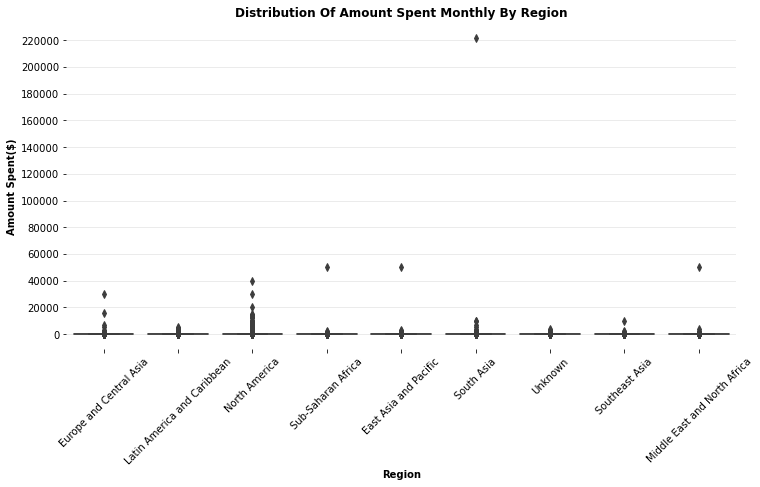

In [64]:
# generating a box plot of the amount spent
plt.figure(figsize=(12,6))
ax = sns.boxplot(data=fcc, x="region", y="amount_per_month")
spines = ["top", "bottom", "right", "left"]
for spine in spines:
    ax.spines[spine].set_visible(False)
ax.grid(axis="y", alpha=0.3)
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 240000, step=20000))
plt.title("Distribution Of Amount Spent Monthly By Region", weight="bold")
plt.ylabel("Amount Spent($)", weight="bold")
plt.xlabel("Region", weight="bold")
plt.show()

Looking at the box plot, most values up of 20,000 are outliers. So we are going to drop rows where the amount spent is greater than 20,000 and then visualize the data again.

In [65]:
# removing outlier and grouping by region and aggregating by mean
average_amount_region_no_outliers = fcc[fcc["amount_per_month"]<20000].groupby("region")["amount_per_month"].mean()
average_amount_region_no_outliers.sort_values(ascending=False)

region
North America                   113.832765
East Asia and Pacific            52.349810
Europe and Central Asia          45.983554
Latin America and Caribbean      35.579882
South Asia                       35.409935
Southeast Asia                   28.449191
Middle East and North Africa     26.840728
Sub-Saharan Africa               25.034884
Unknown                          22.255605
Name: amount_per_month, dtype: float64

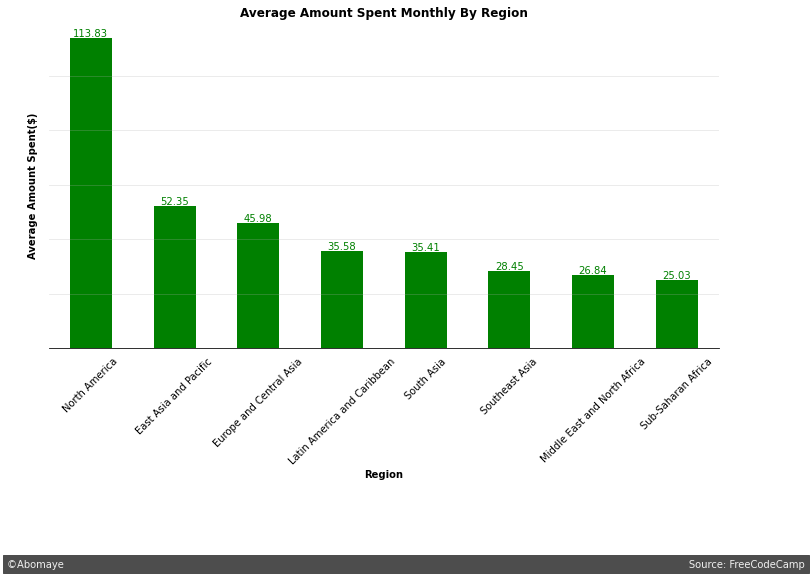

In [66]:
ax = average_amount_region_no_outliers.sort_values(ascending=False).drop("Unknown").plot.bar(figsize=(12, 6),
                                                                                                            color="green")
spines = ["top", "right", "left"]
for spine in spines:
    ax.spines[spine].set_visible(False)
ax.grid(True, alpha=0.3, axis="y")
ax.tick_params(bottom=0, left=0)
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 120, 20), labels=[])
plt.ylabel("Average Amount Spent($)", weight="bold")
ax.bar_label(ax.containers[0], color="green", fmt="%.2f")
plt.xlabel("Region", weight="bold")
ax.text(-1, -80, "©Abomaye" +" "*200 + "Source: FreeCodeCamp",
       color="#f0f0f0", backgroundcolor="#4d4d4d")
plt.title("Average Amount Spent Monthly By Region", weight="bold")
plt.show()

After removing the outliers, North America becomes the region where the most money is spent with an average of 113 dollars spent each month. Sub-Saharan Africa is the region with the least amount spent each month.

To get the count of the most used resources, we are going to split the `online_resources` column by `","` and the create a frequency table for each online resource using a dictionary.

In [67]:
fcc["online_resources"] = fcc["online_resources"].str.split(",")

In [68]:
# getting resources count
resources_count = {}
for index, row in fcc.iterrows():
    for resource in row["online_resources"]:
        if resource in resources_count:
            resources_count[resource] += 1
        else:
            resources_count[resource] = 1
            
online_resources = pd.DataFrame.from_dict(resources_count, orient="index", columns=["count"])
online_resources

,count
freeCodeCamp,14510
Mozilla Developer Network (MDN),4540
Stack Overflow,7445
Khan Academy,2723
EdX,2351
...,...
Youtube.com,1
None yet. First time,1
nodeschool.io,1
Cisco Netacad,1


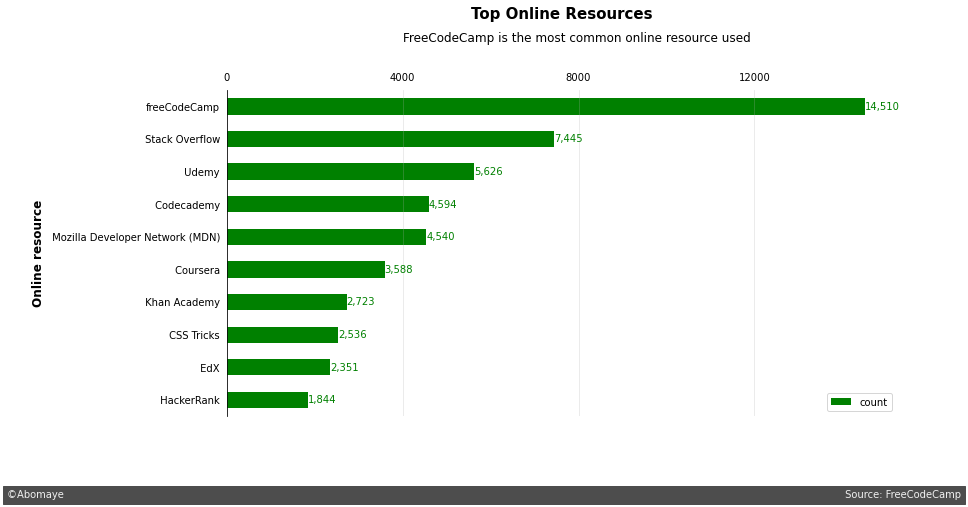

In [69]:
# plotting the top 10 most common online_resource
ax = online_resources.sort_values("count", ascending=False).head(10).iloc[::-1].plot.barh(figsize=(12, 6), color="green")
spines = ["top", "bottom", "right"]
for spine in spines:
    ax.spines[spine].set_visible(False)
ax.set_xticks(np.arange(0, 15000, 4000))
ax.get_xaxis().tick_top()
ax.tick_params(bottom=0, left=0, top=0)
ax.grid(axis="x", alpha=0.3)
ax.set_ylabel("Online resource", weight="bold", size=12)
ax.bar_label(ax.containers[0], color="green",
            labels= [f"{x:,.0f}" for x in ax.containers[0].datavalues])
plt.title("Top Online Resources", weight="bold", size=15, y=1.2)
ax.text(4000, 11, "FreeCodeCamp is the most common online resource used", size=12)
ax.text(-5000,-3, "©Abomaye" +" "*250 + "Source: FreeCodeCamp",
       color="#f0f0f0", backgroundcolor="#4d4d4d")
plt.show()


FreeCodeCamp is by far the most common online resource used by respondents, followed by Stack Overflow, Udemy, etc.

## How much do new devs expect to earn?
We are interested in how much new devs expect to earn and how it compares to devs who are already employed but have no more than 2 years experience.

In [70]:
fcc["dev_interest"].value_counts()

Yes                         14562
I am already a developer     1657
No                           1316
Unknown                       589
Name: dev_interest, dtype: int64

14,562 respondents are interested in becoming a dev.

In [71]:
fcc["employed_dev"].value_counts()

No         15916
Yes         1755
Unknown      453
Name: employed_dev, dtype: int64

Out of all the respondents who took the survey, 1,755 of them are employed as devs.

In [72]:
# filtering to get respondents with dev interest and not employed
new_devs = fcc[(fcc["dev_interest"] == "Yes") & (fcc["employed_dev"] == "No") ].copy()

In [73]:
new_devs.shape

(14126, 45)

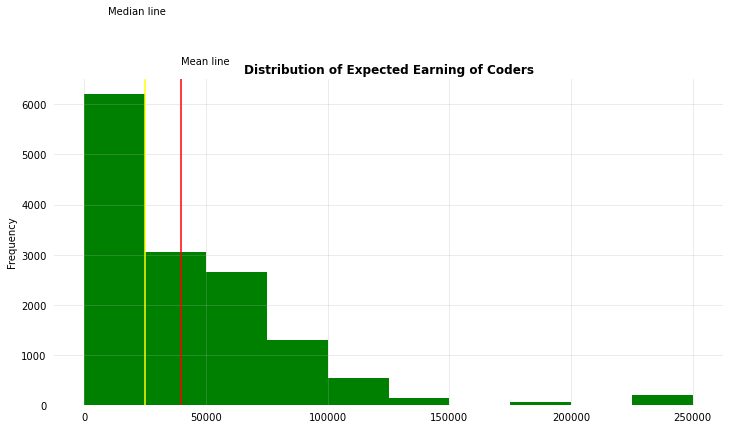

In [74]:
ax, fig = plt.subplots(figsize=(12, 6))
ax = new_devs["expected_earnings"].plot.hist(color="green")
ax.tick_params(bottom=0, left=0)
spines = ["top", "bottom", "right", "left"]
for spine in spines:
    ax.spines[spine].set_visible(False)
ax.grid(True, alpha=0.3)
ax.set_title("Distribution of Expected Earning of Coders", weight="bold")
# adding mean and median verticle lines
ax.axvline(new_devs["expected_earnings"].mean(), color="red")
ax.axvline(new_devs["expected_earnings"].median(), color="yellow")
ax.text(new_devs["expected_earnings"].mean(), 6800, "Mean line")
ax.text((new_devs["expected_earnings"].median()-15000), 7800, "Median line")

plt.show()

In [75]:
round(new_devs["expected_earnings"].mean())

39628

On average, new devs expect to earn around 39,000 dollars.

In [76]:
new_devs["expected_earnings"].median()

25000.0

If we look at the median, then the expected earnings for new devs is 25,000 dollars. From the histogram, the median seems to be a more representative amount of how much new devs expect to earn.

In [77]:
# filtering for employed devs with no more than 2 years experience and have earned a salary
employed_new_devs = fcc[((fcc["employed_dev"] == "Yes" ) & 
                         (fcc["months_programming"] <= 24) & 
                         (fcc["previous_year_earnings"] > 0))].copy()

In [78]:
employed_new_devs.shape

(671, 45)

Out of all the respondents who are already employed as devs, 671 of them have no more than 2 years experience and have earned a salary.

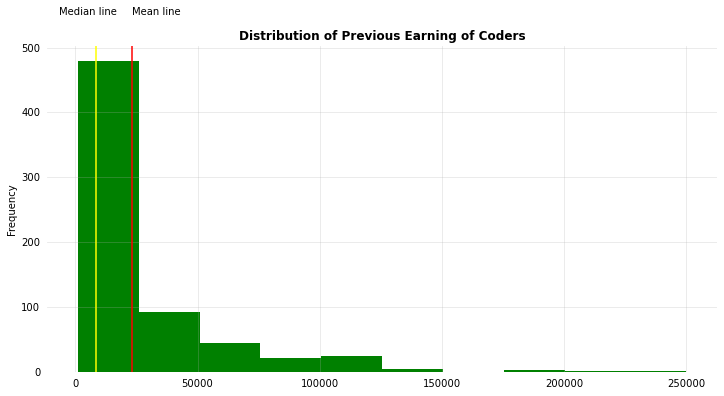

In [79]:
ax, fig = plt.subplots(figsize=(12, 6))
ax = employed_new_devs["previous_year_earnings"].plot.hist(color="green")
ax.tick_params(bottom=0, left=0)
spines = ["top", "bottom", "right", "left"]
for spine in spines:
    ax.spines[spine].set_visible(False)
ax.grid(True, alpha=0.3)
ax.set_title("Distribution of Previous Earning of Coders", weight="bold")
# adding mean and median verticle lines
ax.axvline(employed_new_devs["previous_year_earnings"].mean(), color="red")
ax.axvline(employed_new_devs["previous_year_earnings"].median(), color="yellow")
ax.text(employed_new_devs["previous_year_earnings"].mean(), 550, "Mean line")
ax.text((employed_new_devs["previous_year_earnings"].median()-15000), 550, "Median line")

plt.show()

In [80]:
round(employed_new_devs["previous_year_earnings"].mean())

22991

In [81]:
employed_new_devs["previous_year_earnings"].median()

8500.0

In [82]:
employed_new_devs["previous_year_earnings"].describe()

count       671.000000
mean      22991.058122
std       33533.519571
min        1000.000000
25%        2000.000000
50%        8500.000000
75%       27500.000000
max      250000.000000
Name: previous_year_earnings, dtype: float64

The average salary earned by devs with no more than 2 years experience is 32,829 dollars while the median is 12,000 dollars. The median is a more representative value than the mean for most of the respondents. Therefore, going forward, we'll be working with the median as it is less susceptible to outliers.

In [83]:
# grouping the new_devs data by region and aggregating by the median
new_devs.groupby("region")["expected_earnings"].median().sort_values(ascending=False)

region
North America                   62500.0
East Asia and Pacific           40000.0
Europe and Central Asia         25000.0
Latin America and Caribbean     15500.0
Middle East and North Africa    15500.0
South Asia                      15500.0
Sub-Saharan Africa              15500.0
Southeast Asia                   7500.0
Unknown                          7500.0
Name: expected_earnings, dtype: float64

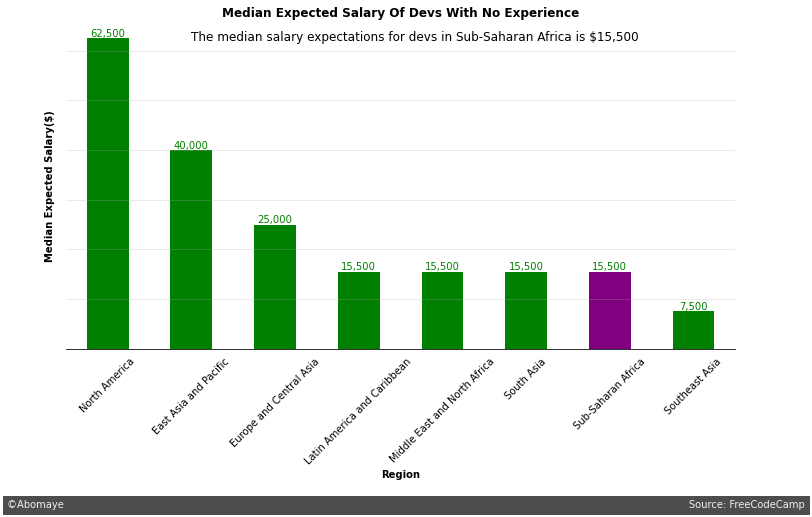

In [84]:
# plotting the median expected earning
colors = ["green" ,"green", "green", "green", "green", "green", "purple", "green"]
ax = new_devs.groupby("region")["expected_earnings"].median().sort_values(ascending=False).drop("Unknown").plot.bar(color=colors, 
                                                                                                                  figsize=(12, 6))
                                                                                                               
spines = ["top", "right", "left"]
for spine in spines:
    ax.spines[spine].set_visible(False)
ax.grid(True, alpha=0.3, axis="y")
ax.tick_params(bottom=0, left=0)
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 70000, 10000), labels=[])
plt.ylabel("Median Expected Salary($)", weight= "bold")
plt.xlabel("Region", weight="bold")
ax.bar_label(ax.containers[0], color="green",
            labels= [f"{x:,.0f}" for x in ax.containers[0].datavalues])
ax.text(1, 62000, "The median salary expectations for devs in Sub-Saharan Africa is $15,500",
        size=12)
ax.text(-1.2, -32000, "©Abomaye" +" "*200 + "Source: FreeCodeCamp",
       color="#f0f0f0", backgroundcolor="#4d4d4d")
plt.title("Median Expected Salary Of Devs With No Experience",
          weight="bold")
plt.show()


Devs in North America expect higher salaries than devs in other regions. Devs in Southeast Asia have the least exoectations.

In [85]:
# grouping employed_new_devs by region and aggregating by the median
employed_new_devs.groupby("region")["previous_year_earnings"].median().sort_values(ascending=False)

region
North America                   45000.0
East Asia and Pacific           32500.0
Europe and Central Asia         17500.0
Latin America and Caribbean      4000.0
South Asia                       4000.0
Southeast Asia                   4000.0
Middle East and North Africa     2000.0
Sub-Saharan Africa               2000.0
Unknown                          1500.0
Name: previous_year_earnings, dtype: float64

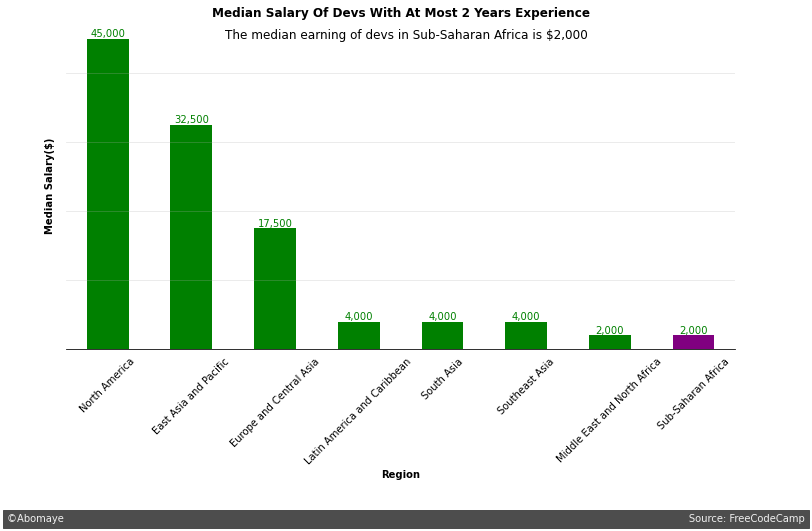

In [86]:
# plotting the median previous year earnings
colors = ["green" ,"green", "green", "green", "green", "green", "green", "purple"]
ax = employed_new_devs.groupby("region")["previous_year_earnings"].median().sort_values(ascending=False).drop("Unknown").plot.bar(color=colors, 
                                                                                                                                figsize=(12, 6))                                     
spines = ["top", "right", "left"]
for spine in spines:
    ax.spines[spine].set_visible(False)
ax.grid(True, alpha=0.3, axis="y")
ax.tick_params(bottom=0, left=0)
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 50000, 10000), labels=[])
plt.ylabel("Median Salary($)", weight= "bold")
plt.xlabel("Region", weight="bold")
ax.bar_label(ax.containers[0], color="green",
            labels= [f"{x:,.0f}" for x in ax.containers[0].datavalues])
ax.text(1.4, 45000, "The median earning of devs in Sub-Saharan Africa is $2,000",
        size=12)
ax.text(-1.2, -25000, "©Abomaye" +" "*200 + "Source: FreeCodeCamp",
       color="#f0f0f0", backgroundcolor="#4d4d4d")
plt.title("Median Salary Of Devs With At Most 2 Years Experience",
          weight="bold")
plt.show()

Comparing the expectations with the actual earnings, there is a clear drop in the actual earning, with devs in most regions earning less than the expected salaries of new devs. People in North America still earn the most with a median salary of 40,000 dollars. Devs in the region I'm from earn(Sub-Saharn Africa) earn the least with a median salary of 1,000 dollars which is 90% less than what new devs from the region expect to earn. It is also important to note that the number of devs with no more than 2 years experience that have earned a salary from our survey data is 671 and so while this is an interesting insight I don't think it is very representative.

## Are dev jobs inclusive?
We want to look at the data of devs who are already employed and find out what percentage gender minority and racial minority make up.


In [87]:
employed_dev = fcc[fcc["employed_dev"] == "Yes"].copy()

In [88]:
employed_dev.shape

(1755, 45)

1,755 of all respondents are employed as devs.

In [89]:
employed_dev["gender"].value_counts(normalize=True)

Male                 0.764103
Female               0.193732
Prefer not to say    0.015385
Unknown              0.013675
Nonbinary            0.010826
Queer                0.000570
Nonbinary girl       0.000570
attack helicopter    0.000570
Cyborg               0.000570
Name: gender, dtype: float64

In [90]:
def clean_gender(val):
    if "binary" in val:
        val = "Non binary"
    if val not in ['Male', 'Female', 'Prefer not to say', 'Unknown', 'Non binary']:
        val = "Others"
    return val

In [91]:
employed_dev["clean_gender"] = employed_dev["gender"].apply(clean_gender)

In [92]:
employed_dev["clean_gender"].value_counts()

Male                 1341
Female                340
Prefer not to say      27
Unknown                24
Non binary             20
Others                  3
Name: clean_gender, dtype: int64

In [93]:
employed_dev["race"].value_counts().head(50)

White                                                                                                                                             669
South Asian                                                                                                                                       313
Hispanic/Latino(a/x)                                                                                                                              251
Southeast Asian                                                                                                                                   143
Black/African American                                                                                                                            112
Middle Eastern or North African                                                                                                                    65
East Asian                                                                                          

In [94]:
def clean_race(val):
    if val.lower() == "african" or val.lower() == "west african":
        val = "Black/African American"
        
    elif val.lower() == "indian":
        val = "South Asian"
        
    if val not in ['White', 'South Asian', 'Hispanic/Latino(a/x)', 'Southeast Asian',
       'Black/African American', 'Middle Eastern or North African',
       'East Asian', 'Unknown']:
        val = "Others"
    return val
    
    

In [95]:
employed_dev["clean_race"] = employed_dev["race"].apply(clean_race)

In [96]:
employed_dev["clean_race"].value_counts()

White                              669
South Asian                        335
Hispanic/Latino(a/x)               251
Southeast Asian                    143
Black/African American             121
Others                              79
Middle Eastern or North African     65
East Asian                          48
Unknown                             44
Name: clean_race, dtype: int64

In [97]:
employed_gender_count =employed_dev["clean_gender"].value_counts().drop(["Unknown", "Others"])

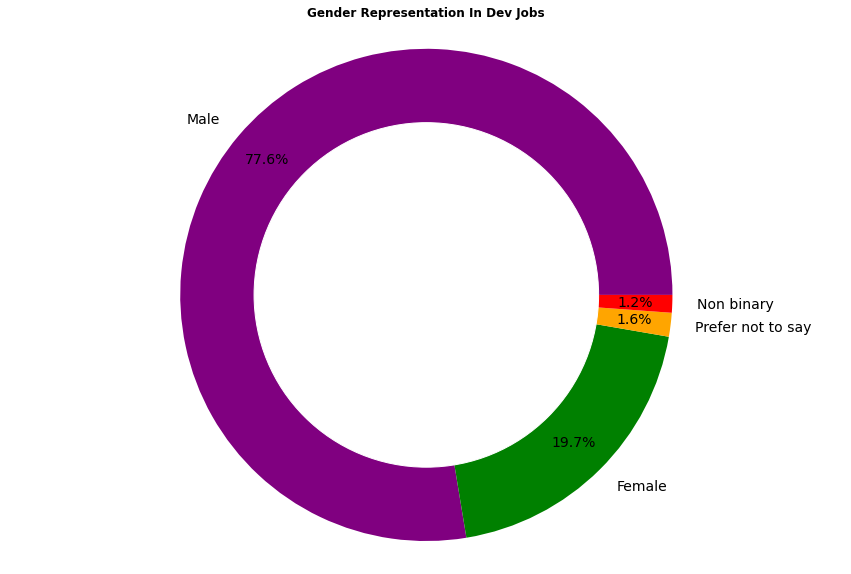

In [98]:
plt.figure(figsize=(15, 10))
labels = employed_gender_count.index
colors = ["purple", "green", "orange", "red"]
textprops = {"fontsize": 14, "color": "black"}
plt.pie(employed_gender_count, colors=colors, labels=labels,
       autopct="%1.1f%%", pctdistance=0.85, textprops=textprops)
# adding the circle
fig = plt.gcf()
circle = plt.Circle((0, 0), 0.7, color="white")
fig.gca().add_artist(circle)
plt.axis("equal")

plt.title("Gender Representation In Dev Jobs", weight="bold")

plt.show()

Out of the 1,755 resondents, 77.6% of them identified as male, 19.7% as female, 1.2% as Non binary. Though the sample size is small, we can still infer that dev jobs are still male dominated.

In [99]:
employed_race_count = employed_dev["clean_race"].value_counts().drop(["Unknown", "Others"])

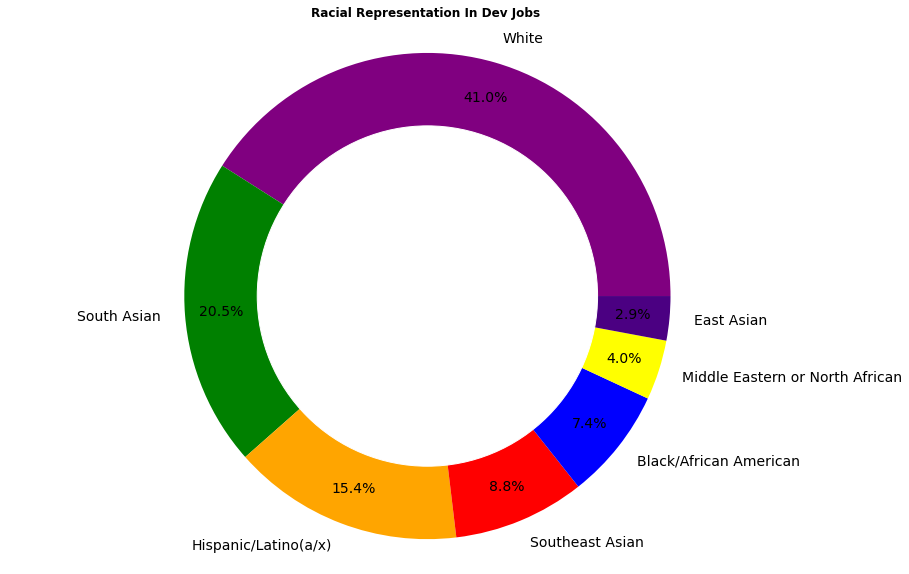

In [100]:
plt.figure(figsize=(15, 10))
labels = employed_race_count.index
colors = ["purple", "green", "orange", "red", "blue", "yellow", "indigo"]
textprops = {"fontsize": 14, "color": "black"}
plt.pie(employed_race_count, colors=colors, labels=labels,
       autopct="%1.1f%%", pctdistance=0.85, textprops=textprops)
# adding the circle
fig = plt.gcf()
circle = plt.Circle((0, 0), 0.7, color="white")
fig.gca().add_artist(circle)
plt.axis("equal")

plt.title("Racial Representation In Dev Jobs", weight="bold")

plt.show()

When will look at the races, dev jobs are still predominatly white dominated accounting for 41% of all the employed devs.

## Conclusion
We set out with an initial goal to answer certain questions about the tech field and dev jobs in particular. We were interested in why people were learning to code, what career they were interested in, what resources they used in learning , etc. So far we've been able to answer all these questions. These answers however are not totally definitive but they do give interesting insights of the current landscape of tech space. 
* The median earning for new devs in Sub-Saharan Africa was just 2,000 dollars, this didn't take into account whether they had full time employment or not, of if they were interns, anyways compared to North America with a median of 45000 dollars, devs in Sub-Saharan Africa are underpaid. Overall there was not enough data on newly employed devs.
* We also found out that people who identify as male and also white people were over represented in the dev jobs. About 77% of respondents with jobs were male and 41% of all respondents with jobs were white.
* Overall most of the new coders do not pay any money to learn. Of the coders who have paid money to learn, coders in the North America pay on average 113 dollars per month which is the region with the highest monthly spend, while coders in Sub-Saharan Africa pay on average 25 dollars per month which is the region with the least monthly spend.
* When we looked at the most used online resources, a huge majority of respondents said they used FreeCodeCamp, this might probably be because the survey was done by FreeCodeCamp and most of the respondents are FreeCodeCamp users.